<center><h1> Notebook demo SVM multiclass </h1></center>

## Classification d'images manuscrites contenant des chiffres entre 0 et 9

Data utililsé : MNIST

Il contient une image en noir et blanc. L'image est au format 28*28 pixels.

Chaque pixel est une nuance de gris entre 0 et 255.

Le dataset contient 70 000 images labélisées pour 784 features (un feature = un pixel)


## Import module

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

#Import SVM
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix


## Function

In [18]:
def plot_img(choose_img, X) :
    plt.imshow(X[choose_img].reshape(28,28), cmap='gray')
    plt.title("Cette image est un :" + str(y[choose_img]))

## Import Data 

In [ ]:
##########
#GET DATA#
##########
#Open with sklearn

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

# dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details',
# 'categories', 'url'])

X , y = mnist["data"] , mnist['target']
X.shape

#(70000, 784)
# Chaque image contient 784 features qui correspodent à la distribution de ses pixels en nuance de gris.
# Sa valeur est entre 0 et 255


#### Visualisation d'une image

In [31]:
#Format X
X[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [28]:
#Reformat pour plot image
pd.DataFrame(X[1].reshape(28,28))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,159.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.0,237.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,233.0,252.0,57.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.0,252.0,253.0,122.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,96.0,189.0,253.0,167.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,47.0,79.0,255.0,168.0,0.0,0.0,0.0,0.0,0.0,0.0


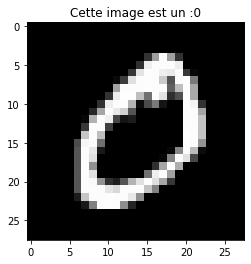

In [34]:
#
plot_img(choose_img = 1 , X = X)


#### Nombre de chiffre par label

In [80]:
for i in range(np.unique(y, return_counts=True)[0].size):
    print("count "+str(i)+": " + str(np.unique(y, return_counts=True)[1][i]))

count 0: 6903
count 1: 7877
count 2: 6990
count 3: 7141
count 4: 6824
count 5: 6313
count 6: 6876
count 7: 7293
count 8: 6825
count 9: 6958


In [ ]:
# Donnees relativement répartie de la même manière. Pour être propre il faudrait avoir autant de 0 que de 1 
# ou 7 dans le jeu d'entrainement

In [85]:
#############
#Train model#
#############

#Mon pc perso n'est pas une machine de guerre. Je réduis la volumétrie 2000 pour le jeu d'entrainement et de test
X_train, X_test, y_train, y_test = X[:2000], X[60000:], y[:2000],y[60000:]



#### Que doit-on vérifier sur notre X_train y_train avant de lancer une modélisation???

In [ ]:
#np.unique(y_train, return_counts=True)

In [116]:
#Classification rapide sans tuner le modèle. Paramètre par défaut
OvR_SVC_clf = OneVsRestClassifier(SVC(random_state=42))
OvO_SVC_clf = OneVsOneClassifier(SVC(random_state=42))

OvR_SVC_clf.fit(X_train, y_train) 
OvO_SVC_clf.fit(X_train , y_train)  

OneVsOneClassifier(estimator=SVC(random_state=42))

In [122]:
#Cross val_score visualisation
cross_val_score(OvR_SVC_clf,X_train,y_train,cv=5)

#### Combien de sous modèles produisent les modules OvR et OvO?

In [96]:
#Nb de sous modèle SVM pour les 2 stratégies 

print('Le modèle OvR produit: '+ str(len(OvR_SVC_clf.estimators_))+' sous modèles')

print('Le modèle OvO produit: '+ str(len(OvO_SVC_clf.estimators_))+' sous modèles')


Le modèle OvR produit: 10 sous modèles
Le modèle OvO produit: 45 sous modèles


In [105]:
#Quel modèle par défaut

OvO_SVC_clf.get_params()

{'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': 42,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(random_state=42),
 'n_jobs': None}

In [98]:
OvR_SVC_clf.get_params()

{'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': 42,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVC(random_state=42),
 'n_jobs': None}

## Prediction du modèle

In [132]:
#Obtenir directement la prédiction par le modèle pour une instance
OvO_SVC_clf.predict(X_test[25].reshape(1,784))

array(['0'], dtype=object)

In [133]:
y_test[25]

'0'

In [131]:
#Looong
confusion_matrix(OvO_SVC_clf.predict(X_test), y_test)

array([[ 955,    0,    9,    1,    1,    6,   12,    0,    6,    7],
       [   0, 1119,    0,    0,    1,    2,    3,   14,    1,    6],
       [   2,    2,  960,   17,    4,    4,    9,   22,   13,    3],
       [   0,    3,    7,  894,    0,   13,    0,    4,   14,   10],
       [   4,    0,   15,    1,  920,    8,   11,    8,   10,   31],
       [   8,    0,    1,   60,    0,  833,    8,    0,   38,    9],
       [   7,    5,   10,    1,    9,   10,  914,    0,   11,    0],
       [   1,    1,    9,   15,    2,    7,    0,  939,    7,   15],
       [   2,    5,   19,   18,    1,    4,    1,    5,  848,    5],
       [   1,    0,    2,    3,   44,    5,    0,   36,   26,  923]],
      dtype=int64)

In [135]:
# Pour comprendre la prédiction du modèle regardons sa frontière de décision
# Comme vu en cours la frontière de décision possède une équation et permet après de classifier le modèle.

OvO_SVC_clf.decision_function(X_test[6001].reshape(1,784))

array([[ 2.73262999, -0.27421502,  3.79458052,  8.26753823,  1.72812984,
         7.25294674,  4.85863555,  0.70919746,  9.31039645,  6.2025784 ]])

In [35]:
#Score qui maximise la classe. Ci dessus 9.31039645
np.argmax(OvO_SVC_clf.decision_function(X_test[6001].reshape(1,784)))

8

In [36]:
#Nous prédisons un 8 pour 8. Ca marche!!
y_test[6001]

'8'

In [37]:
#Nous avons de la change, pour une fois les classes correspondent au label qu'on cherche à prédire.
# Label N°2 = 2 manuscrits. 
# ATTENTION ce n'est aps tout le temps le cas

OvO_SVC_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [ ]:
## Chaque modèle va prédire une probabilité pour que notre digits soit un label
## On prendra celui qui maximise la proba

In [ ]:
#Stop